### Introduction to Regression with neural networks in tensorflow

There are many definition for a regression problem but in our case. we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter...predicting a number.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.16.1


### Creating data to view and fit

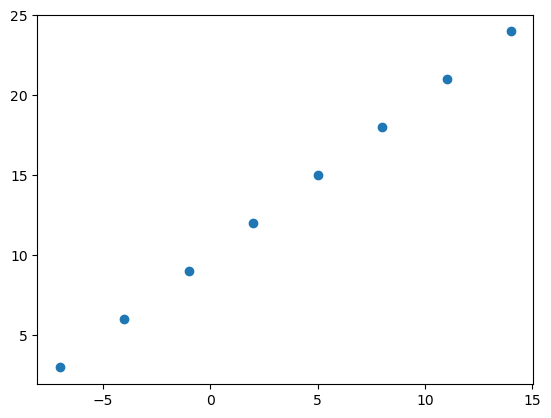

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [3]:
y==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output smapes

In [4]:
# Create a demo tensor for our housing price prediction problem

house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
# Turn our NumPy arrays into tensors with float32

X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])
X, y


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

### Steps in modelling with tensorflow
1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (in other words, the function which tells out model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrices (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X and &y (features and labels)

In [8]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,  # mae is short gt mean absolute error)
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae']) 

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step - loss: 10.0581 - mae: 10.0581
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 9.9256 - mae: 9.9256
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 9.7931 - mae: 9.7931
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 9.6606 - mae: 9.6606
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 9.5281 - mae: 9.5281
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 9.3956 - mae: 9.3956
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 9.2631 - mae: 9.2631
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 9.1306 - mae: 9.1306
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 8.9981 - mae: 8.9981
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 8.8656 - mae: 8.8656


In [9]:
# check for X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
# Try and make a prediction using our moodel
input_data = np.array([17.0])

# Make the prediction
prediction = model.predict(input_data)

print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[[22.76794]]


### Improving our model

We can improve our model, by altering the steps we took to create a model.

1. We can add layers, increase the number of hidden units, change activation function of each layer
2. We can change the optimization function or learning rate
3. Increase epochs

In [11]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,  # mae is short gt mean absolute error)
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae']) 

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step - loss: 9.3370 - mae: 9.3370
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 9.2045 - mae: 9.2045
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 9.0720 - mae: 9.0720
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 8.9395 - mae: 8.9395
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 8.8070 - mae: 8.8070
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 8.6745 - mae: 8.6745
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 8.5420 - mae: 8.5420
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 8.4095 - mae: 8.4095
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 8.2770 - mae: 8.2770
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 8.1445 - mae: 8.1445
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 8.0120 - mae: 8.0120
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 7.8795 - mae: 7.8795
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/st

In [12]:
# Try and make a prediction using our moodel
input_data = np.array([17.0])

# Make the prediction
prediction = model.predict(input_data)

print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
[[29.932613]]


In [13]:

# Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss='mae',  # mae is short gt mean absolute error)
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae']) 

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=500)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 13.1941 - mae: 13.1941
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 12.4429 - mae: 12.4429
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 11.6886 - mae: 11.6886
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 10.9277 - mae: 10.9277
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 10.1583 - mae: 10.1583
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 9.3778 - mae: 9.3778
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 8.5842 - mae: 8.5842
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 7.7752 - mae: 7.7752
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 6.9486 - mae: 6.9486
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 6.7868 - mae: 6.7868
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 7.1434 - mae: 7.1434
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 7.3716 - mae: 7.3716
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [14]:
# Try and make a prediction using our moodel
input_data = np.array([17])

# Make the prediction
prediction = model.predict(input_data)

print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
[[26.769762]]


In [15]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 455 (1.78 KB)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 304 (1.19 KB)

### Evaluating a model 

In practice, a typical workflow we will go through when building neural network is:

> Build a model -> Fit it -> Evaluate -> Tweak a model -> Fit it -> Evaluate it -> Tweak a modek -> Fit it -> Evaluate it


When it comes to evaluation there are 3 words we should memorize:

> Visualize, Visualize, Visualize

It's a good idea to visualize:
* The data - what data are we working with? What does it lookk like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground

In [16]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X


<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [17]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

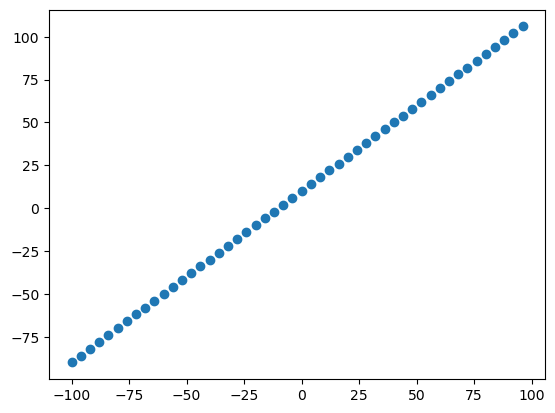

In [18]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets

* Training set - the model learns from this data, which is 70-80% of data available.
* The Validation set - The model gets tuned on this data, which is around 10-15% of data available.
* Test set - The model gets evaluated on this data to test which is has learned, this set is typically 10-15% of total data available.

In [19]:
# Check the length of how many samples we have
len(X)

50

In [20]:
# Split the data into train and test set
X_train = X[:40] # 80% of data
y_train = y[:40]
X_test = X[40:] # lest 20% of data
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data



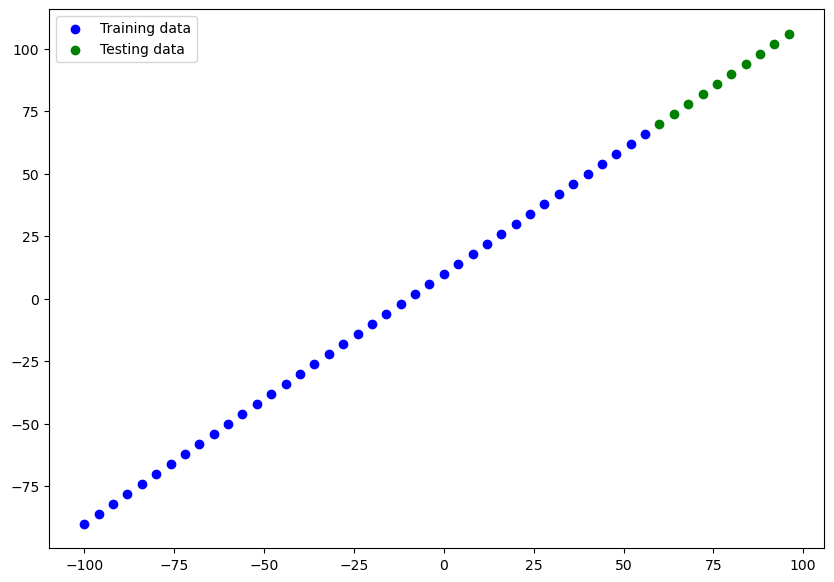

In [21]:
plt.figure(figsize=(10, 7))
# plot training data in blue
plt.scatter(X_train, y_train, c='blue', label='Training data')
# plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# show a legend
plt.legend()

In [22]:
# neural network

# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# Fit the model
#model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [23]:
# neural network
tf.random.set_seed(42)
# create a model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,), name='input_layer'),
    tf.keras.layers.Dense(64, activation='relu', name='hidden_layer_1'),
    tf.keras.layers.Dense(32, activation='relu', name='hidden_layer_2'),
    tf.keras.layers.Dense(1, name='output_layer')
], name="model_1")

#compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# Fit the model
#model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [24]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,241 (8.75 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

* total params - the number of parameters in the model.
* trainable parameters - These are the parameters (patterns) the model can update as it trains.
* non-trainable params - These parameters aren't updated during training (this is typical when we bring in already learn patterns or parameters from other models during transfer learning)

In [25]:
# Lets fit our model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200, verbose=0)

In [26]:
# Get summary of our model
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,725 (26.27 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,484 (17.52 KB)

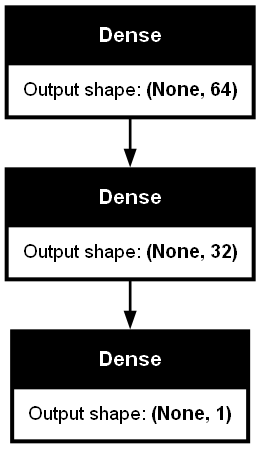

In [27]:
from tensorflow.keras.utils import plot_model
from PIL import Image
import matplotlib.pyplot as plt  

plot_model(model=model, show_shapes=True, dpi=96) 


Visualizing our models predictions

In [28]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[ 69.44624 ],
       [ 73.40956 ],
       [ 77.372894],
       [ 81.33621 ],
       [ 85.299545],
       [ 89.26288 ],
       [ 93.22621 ],
       [ 97.18953 ],
       [101.15286 ],
       [105.11618 ]], dtype=float32)

In [29]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [30]:
import matplotlib.pyplot as plt

def plot_predictions(train_data, train_labels, test_data, test_labels, predictions):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c='b', label='Training Data')
    plt.scatter(test_data, test_labels, c='g', label='Testing Data')
    plt.scatter(test_data, predictions, c='r', label='Predictions')
    plt.legend()
    plt.show()

# Example call to plot_predictions (assuming X_train, y_train, X_test, y_test, y_pred are defined)
# plot_predictions(X_train, y_train, X_test, y_test, y_pred)


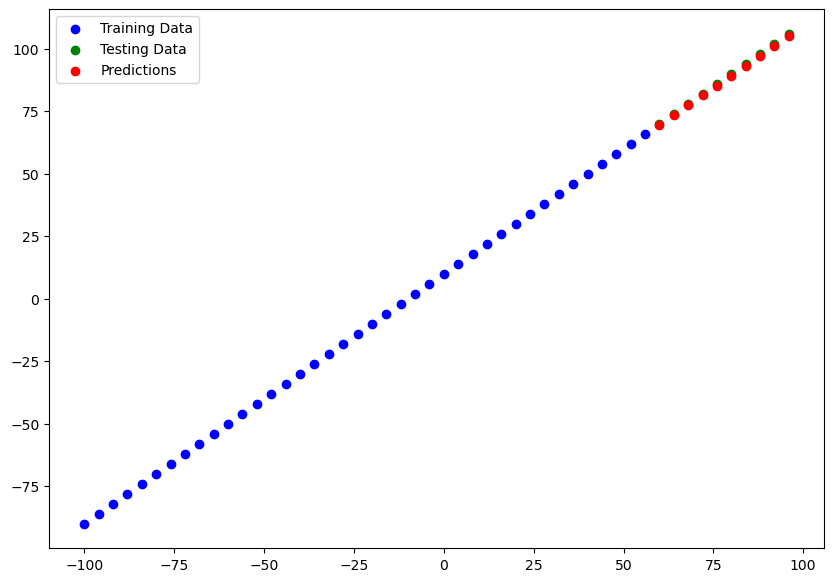

In [31]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred)


### Evaluate our model predictions with regression evaluation metrices

Two main metrics
* MAE
* MSE

In [32]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - loss: 0.7188 - mae: 0.7188


[0.7187881469726562, 0.7187881469726562]

In [33]:
# Calculate the MAE
mae = tf.metrics.MAE(y_true=y_test, y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.5537567 , 0.59043884, 0.6271057 , 0.66378784, 0.7004547 ,
       0.7371216 , 0.77378845, 0.8104706 , 0.84713745, 0.8838196 ],
      dtype=float32)>

In [34]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 69.44624 ],
       [ 73.40956 ],
       [ 77.372894],
       [ 81.33621 ],
       [ 85.299545],
       [ 89.26288 ],
       [ 93.22621 ],
       [ 97.18953 ],
       [101.15286 ],
       [105.11618 ]], dtype=float32)>

In [35]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [36]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.44624 ,  73.40956 ,  77.372894,  81.33621 ,  85.299545,
        89.26288 ,  93.22621 ,  97.18953 , 101.15286 , 105.11618 ],
      dtype=float32)>

In [37]:
mae = tf.metrics.MAE(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.71878815>

In [38]:
# Using MSE for building neural network
tf.random.set_seed(42)
# create a model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,), name='input_layer'),
    tf.keras.layers.Dense(64, activation='relu', name='hidden_layer_1'),
    tf.keras.layers.Dense(32, activation='relu', name='hidden_layer_2'),
    tf.keras.layers.Dense(1, name='output_layer')
], name="model_1")

#compile the model
model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mse'])

# Fit the model
#model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [39]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,241 (8.75 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200, verbose=0)

In [41]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,725 (26.27 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,484 (17.52 KB)

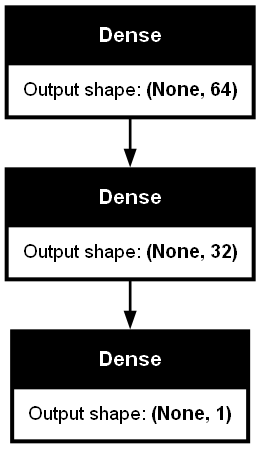

In [42]:
from tensorflow.keras.utils import plot_model
from PIL import Image
import matplotlib.pyplot as plt  

plot_model(model=model, show_shapes=True, dpi=96) 


In [43]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


array([[ 69.81617 ],
       [ 73.80279 ],
       [ 77.789406],
       [ 81.77602 ],
       [ 85.76264 ],
       [ 89.749245],
       [ 93.73587 ],
       [ 97.894806],
       [102.15827 ],
       [106.42173 ]], dtype=float32)

In [44]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [45]:
import matplotlib.pyplot as plt

def plot_predictions(train_data, train_labels, test_data, test_labels, predictions):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c='b', label='Training Data')
    plt.scatter(test_data, test_labels, c='g', label='Testing Data')
    plt.scatter(test_data, predictions, c='r', label='Predictions')
    plt.legend()
    plt.show()

# Example call to plot_predictions (assuming X_train, y_train, X_test, y_test, y_pred are defined)
# plot_predictions(X_train, y_train, X_test, y_test, y_pred)


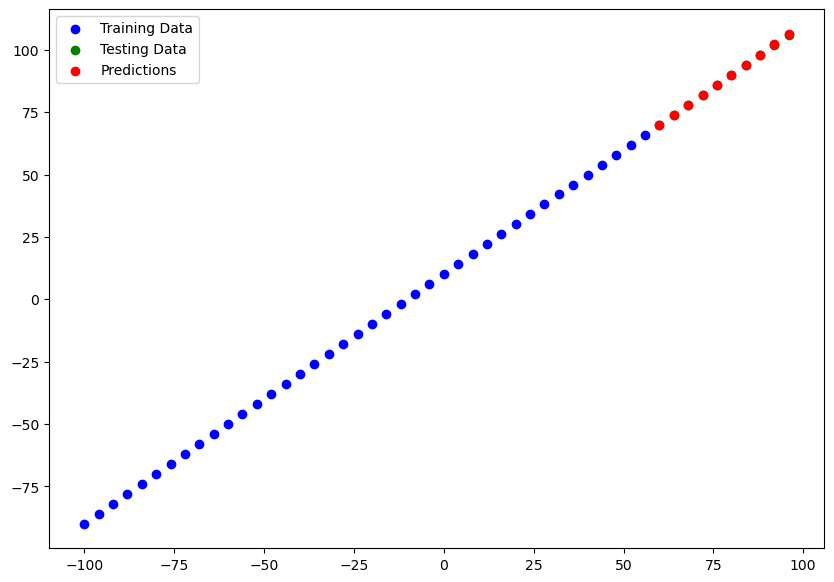

In [46]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

In [47]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 0.0570 - mse: 0.0570


[0.05701584368944168, 0.05701584368944168]

In [48]:
# Calculate the MAE
mse = tf.metrics.MSE(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.057015844>

In [49]:
# Make functions to reuse MSE and MAE

def mae(y_true, y_pred):
    return tf.metrics.MAE(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.MSE(y_true=y_true, y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

Let's do 3 modelling experiments

1. 'model_1' - same as the original model, 1 layer, trained for 100 epochs
2. 'model_2' - 2 layers, trained for 100 epochs
3. 'model_3' - 2 layers, traned for 500 epochs

*Build model_1 *

In [50]:
#set random_seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile
model_1.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 93.7717 - mae: 93.7717 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 58.6034 - mae: 58.6034 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24.0775 - mae: 24.0775 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.7741 - mae: 11.7741 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.7130 - mae: 8.7130 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.1818 - mae: 10.1818 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.9197 - mae: 11.9197 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.8228 - mae: 8.8228 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.2915 - mae: 10.2915 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.0891 - mae: 12.0891 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.5540 - mae: 12.5540 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.9937 - mae: 7.9937 
Epoch 13/100
2/2 ━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


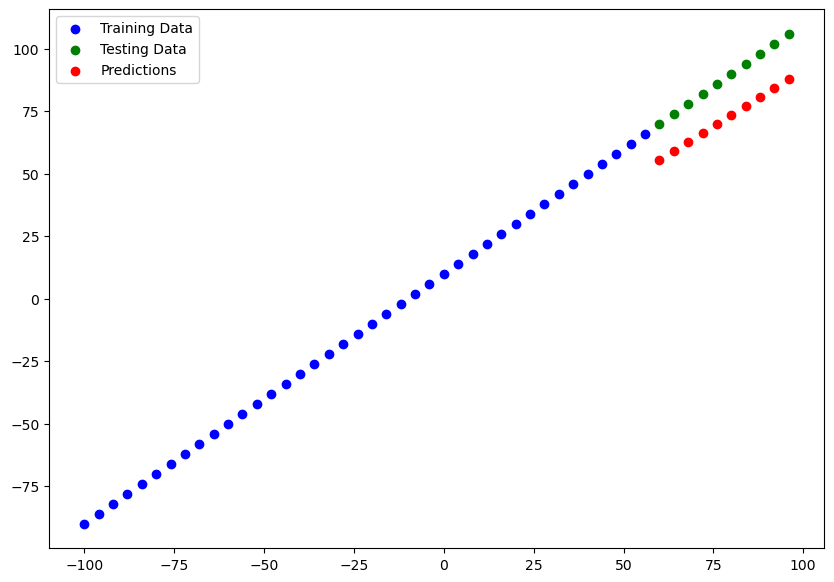

In [51]:
# Make and plot predictions for model_1
y_pred_1 = model_1.predict(X_test)
plot_predictions(X_train, y_train, X_test, y_test, y_pred_1)

In [52]:
tf.constant(y_pred_1), tf.squeeze(y_pred_1)


(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[55.559574],
        [59.171753],
        [62.78393 ],
        [66.39611 ],
        [70.00829 ],
        [73.62047 ],
        [77.23265 ],
        [80.84483 ],
        [84.45701 ],
        [88.06919 ]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([55.559574, 59.171753, 62.78393 , 66.39611 , 70.00829 , 73.62047 ,
        77.23265 , 80.84483 , 84.45701 , 88.06919 ], dtype=float32)>)

In [53]:
# Calculate model_1 evaluatin metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1


(<tf.Tensor: shape=(), dtype=float32, numpy=16.18562>,
 <tf.Tensor: shape=(), dtype=float32, numpy=263.2151>)

*Build 'model_2'* - 2 layers, trained for 100 epochs

In [54]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(10, name='hidden_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
], name='simple_nn')

model_2.compile(loss=tf.keras.losses.mae, 
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 41.8737 - mae: 41.8737 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.4537 - mae: 10.4537
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.3312 - mae: 14.3312 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.6635 - mae: 13.6635 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17.3360 - mae: 17.3360 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.8254 - mae: 9.8254 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.9561 - mae: 10.9561 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.0969 - mae: 12.0969 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13.2680 - mae: 13.2680 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.9395 - mae: 15.9395 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.3205 - mae: 9.3205 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.2798 - mae: 10.2798
Epoch 13/100
2/2 ━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


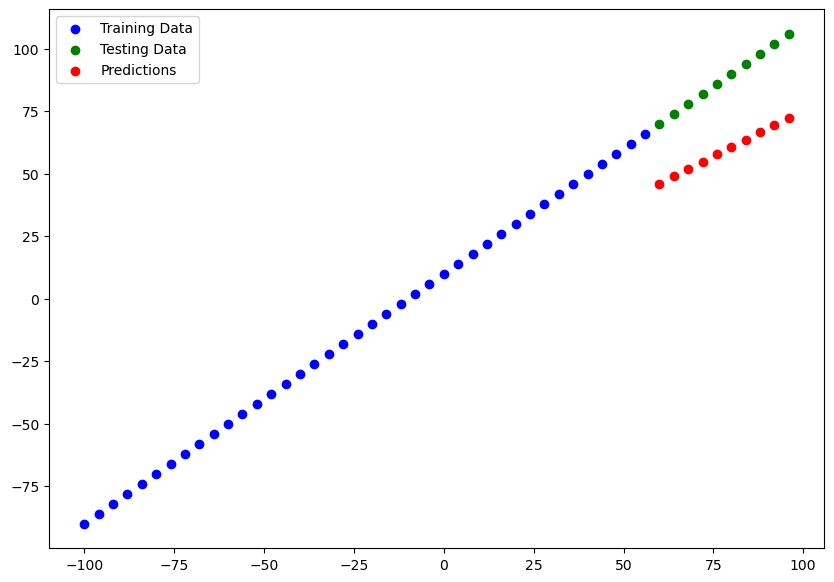

In [55]:
# Make predictions for model_2
y_pred_2 = model_2.predict(X_test)
plot_predictions(X_train, y_train, X_test, y_test, y_pred_2)

In [56]:
tf.constant(y_pred_2), tf.squeeze(y_pred_2)

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[46.09015 ],
        [49.022964],
        [51.95578 ],
        [54.88859 ],
        [57.821415],
        [60.75423 ],
        [63.687042],
        [66.619865],
        [69.55268 ],
        [72.48549 ]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([46.09015 , 49.022964, 51.95578 , 54.88859 , 57.821415, 60.75423 ,
        63.687042, 66.619865, 69.55268 , 72.48549 ], dtype=float32)>)

In [57]:
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=28.71218>,
 <tf.Tensor: shape=(), dtype=float32, numpy=833.785>)

'model_3' - 2 layers, traned for 500 epochs

In [58]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(64, name='hidden_layer'),
    tf.keras.layers.Dense(32, name='hidden_layer_1'),
    tf.keras.layers.Dense(1, name='output_layer')
], name='simple_nn_3')

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['mae'])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 36.6583 - mae: 36.6583
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28.4196 - mae: 28.4196 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.7017 - mae: 23.7017 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.0555 - mae: 8.0555 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.6068 - mae: 17.6068 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.4310 - mae: 12.4310 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.5962 - mae: 9.5962 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.5204 - mae: 13.5204 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.4152 - mae: 11.4152 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.3219 - mae: 7.3219 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.5380 - mae: 9.5380 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.3619 - mae: 9.3619 
Epoch 13/500
2/2 ━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


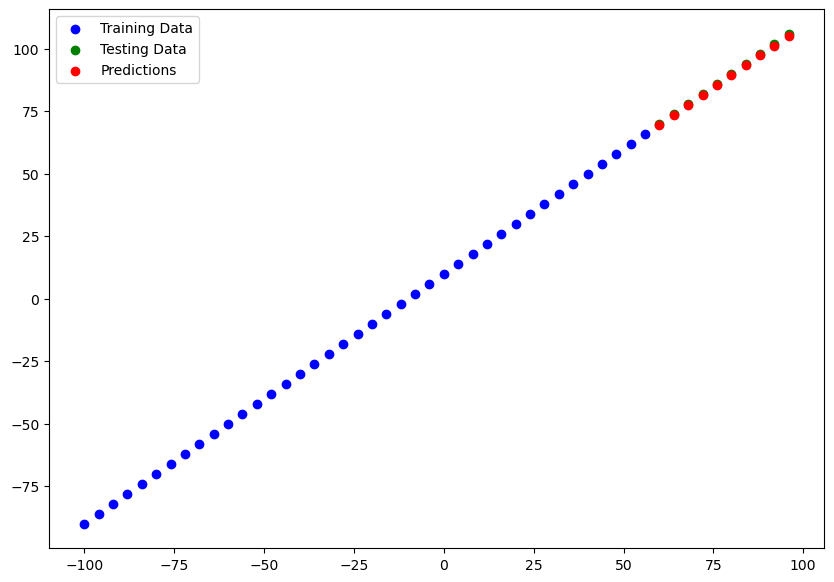

In [59]:
# Make predictions for model_3
y_pred_3 = model_3.predict(X_test)
plot_predictions(X_train, y_train, X_test, y_test, y_pred_3)

In [60]:
tf.constant(y_pred_3), tf.squeeze(y_pred_3)

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 69.532   ],
        [ 73.50342 ],
        [ 77.47482 ],
        [ 81.44625 ],
        [ 85.41766 ],
        [ 89.38908 ],
        [ 93.36049 ],
        [ 97.331894],
        [101.30332 ],
        [105.274734]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 69.532   ,  73.50342 ,  77.47482 ,  81.44625 ,  85.41766 ,
         89.38908 ,  93.36049 ,  97.331894, 101.30332 , 105.274734],
       dtype=float32)>)

In [61]:
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=0.59663314>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.36271232>)

In [70]:
model_3.summary()

Model: "simple_nn_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_1 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,725 (26.27 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,484 (17.52 KB)

### Note - We should start with small experiments

### Comparing the results of our experiments

In [62]:
import pandas as pd

model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                 ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,16.185619,263.215088
1,model_2,28.712179,833.784973
2,model_3,0.596633,0.362712


Seems model_2 performed the best

In [63]:
model_2.summary()

Model: "simple_nn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

### Tracking the experiments

One really good habit in ML modelling is to track the results of our experiments.

And when doing so, it can be tedious if we're running lots of experiments.

Lukily, there are tools to help us!

*Resource:*
* Tensorboard
* Weights and Biases




## Saving our models

In [64]:
# Save model using SaveModel format
model_3.export("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


Saved artifact at 'best_model_SavedModel_format'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_18')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2416903896256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2416984167120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2416984168704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2416984169056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2416984168000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2416984169408: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [65]:
# Save model using HDF5 format
model_3.save('best_model_HDF5_format.h5')

### Load model


In [76]:
# Load the .h5 model
loaded_SavedModel_format = tf.keras.models.load_model('best_model_HDF5_format.h5')

# Print the model summary
loaded_SavedModel_format.summary()


Model: "simple_nn_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_1 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,243 (8.77 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [87]:
# Compare model_3 predictions with SavedModel format model predictions
model_3_preds = model_3.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_3_preds == loaded_SavedModel_format_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [79]:
mae(y_true=y_test, y_pred=model_3_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)


<tf.Tensor: shape=(), dtype=bool, numpy=True>